# Project 2: Group 7
## Group Members
   - Dharmesh Gautam
   - Sandeep Kothapalli
   - Anup Pathak
   - Melisa Venegas
    

# Project Summary
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 

The project aims to use a publicly available  datasetfrom Kaggle to  predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

## Acknowldgements
Dataset - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

Author - https://www.kaggle.com/fedesoriano

## Atrributes

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

### 1. Include Various Libraries and Dependencies

In [1]:
# Include relevant Panda Libraries and Utilities
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Include pipeline utility for preprocessing, encoding, and scaling
import P2G7_pipeline_utils as p_utils

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Import Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

### 2. Read data into a DataFrame

In [2]:
# Read data into a dataframe from .csv file "healthcare-dataset-stroke-data.csv".
# Source data: Please refer to the Project Summary information above
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Get a quick peek into the dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 3. Analyse Data for missing values, nulls, and other inconsistencies

In [3]:
# Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Nulls present int the BMI column!!! Please review

In [4]:
# Nulls present in the BMI column.
# Analyze bmi value to determine appropriate value for nulls
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [5]:
# Recommended not to drop null. Filling in null bmi with mean of bmi value. New df returned from pipeline - df_bmi_filled. 
df_copy = df.copy()
df_bmi_filled = p_utils.fill_bmi_na(df_copy)
df_bmi_filled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
#check age to determine its distrubtion
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

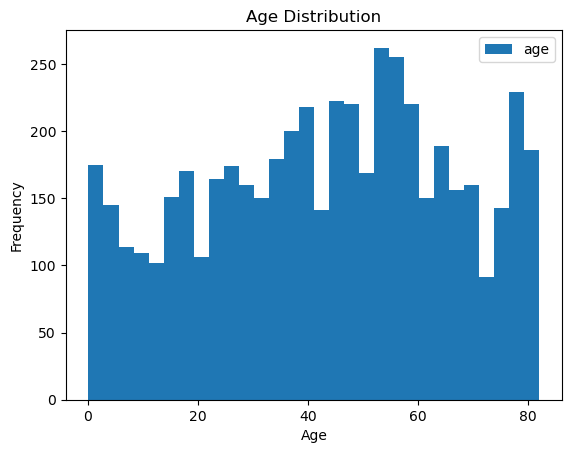

In [7]:
# check age distribution in historgram.
# select bin size based on counts
df["age"].plot(kind="hist", bins=30, legend=True, title="Age Distribution",xlabel="Age")

In [8]:
# Bin age as it is a continuous variable and unique (some repetation). We want to minimize unique features
# Binning is based on quartiles. 
df_bmi_filled_age_bin = p_utils.bin_age(df_bmi_filled)
df_bmi_filled_age_bin.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [9]:
#Show age binning information - count of records, Minimum Age, and Maximum Age
df_bmi_filled_age_bin.groupby("bin_age").agg({'age': ['count', 'min', 'max']}) 

C:\Users\Dharmesh\AppData\Local\Temp\ipykernel_26684\1983027091.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bmi_filled_age_bin.groupby("bin_age").agg({'age': ['count', 'min', 'max']})


age             
        count    min   max
bin_age                   
1        1293   0.08  25.0
2        1325  26.00  45.0
3        1264  46.00  61.0
4        1228  62.00  82.0

#### There are records with age below 1 year in bin 1!!

In [10]:
# check work_type if they are labelled as children. If True, then it represents records correctly for children less than 1 year.
df_bmi_filled_age_bin.work_type[df_bmi_filled_age_bin.age < 1] == 'children'

363     True
376     True
564     True
982     True
996     True
1093    True
1206    True
1317    True
1600    True
1614    True
1808    True
1975    True
1999    True
2008    True
2012    True
2030    True
2358    True
2481    True
2490    True
2579    True
2630    True
2801    True
2875    True
2898    True
3251    True
3295    True
3392    True
3440    True
3618    True
3626    True
3859    True
3894    True
3968    True
4007    True
4021    True
4053    True
4293    True
4409    True
4581    True
4645    True
4910    True
4929    True
5089    True
Name: work_type, dtype: bool

In [11]:
# Check Data Types of all columns
df_bmi_filled_age_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  bin_age            5110 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 484.4+ KB


In [12]:
#Change bin_age to an integer. It was defined as category
df_bmi_filled_age_bin["bin_age"]=df_bmi_filled_age_bin["bin_age"].astype("int64")
df_bmi_filled_age_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  bin_age            5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


In [13]:
# Drop unique features id and age (as they not required for analysis)
df_drop_id_age = p_utils.drop_id_age(df_bmi_filled_age_bin)

In [14]:
df_drop_id_age

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,4
5106,Female,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,4
5107,Female,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2
5108,Male,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,3


### 4. Review Categorical Features. 
Categorical columns are gender, ever_married, work_type, Residence_type, and smoking_status

#### 4.1 Gender

In [15]:
# Check Value distrubution for Gender.
df_drop_id_age['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [16]:
# Drop row with feature gender = Other, as the number of affceted rows are small.
df_final = p_utils.delete_gender_other(df_drop_id_age)
df_final['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

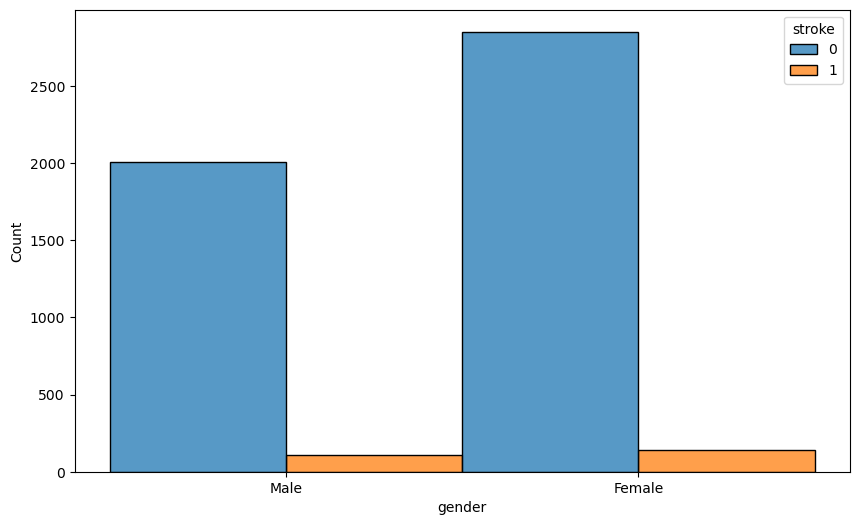

In [17]:
#plot gender count for stroke (1)/ no stroke (0) groupings
plt.figure(figsize=(10,6))
sns.histplot(data=df_final, x='gender', hue='stroke', multiple='dodge')

#### 4.2 Work Type

In [18]:
df_final["work_type"].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: xlabel='work_type', ylabel='Count'>

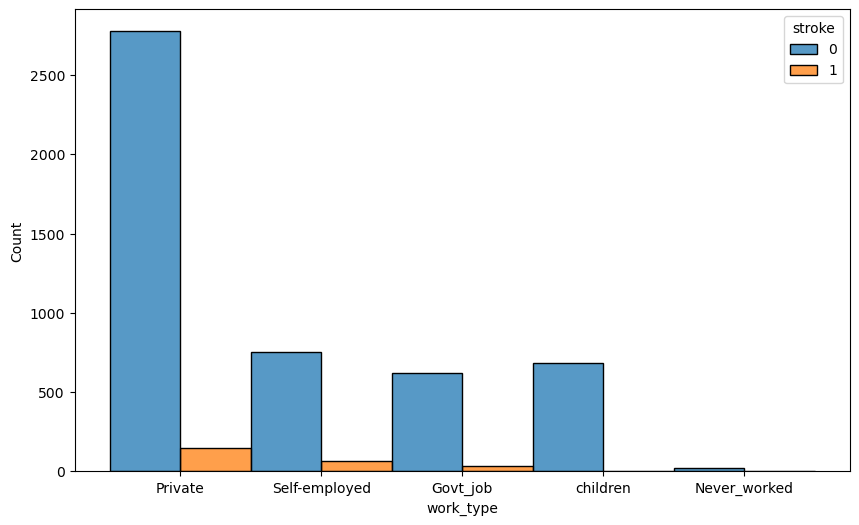

In [19]:
#plot work_type count for stroke (1)/ no stroke (0) groupings
plt.figure(figsize=(10,6))
sns.histplot(data=df_final, x='work_type', hue='stroke', multiple='dodge')

#### 4.3 Residence_type

In [20]:
df_final["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

<Axes: xlabel='Residence_type', ylabel='Count'>

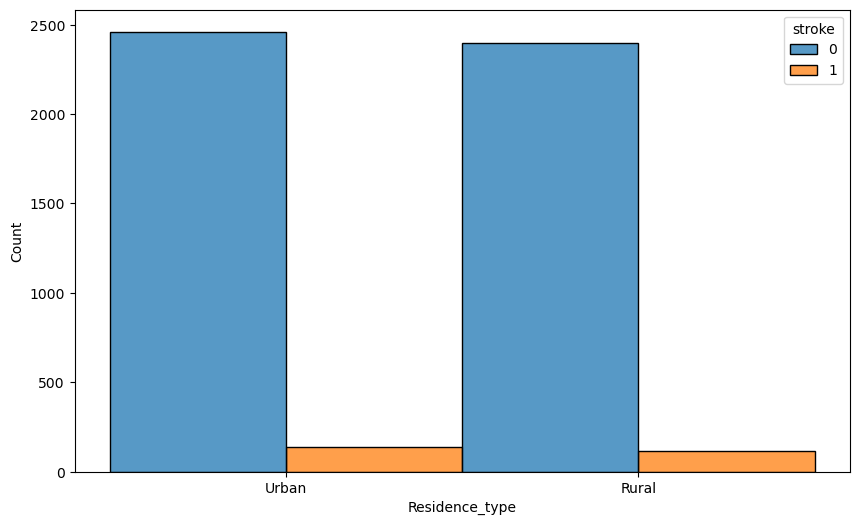

In [21]:
#plot Residence_type count for stroke (1)/ no stroke (0) groupings
plt.figure(figsize=(10,6))
sns.histplot(data=df_final, x='Residence_type', hue='stroke', multiple='dodge')

### 4.4 ever_married

In [22]:
df_final["ever_married"].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

<Axes: xlabel='ever_married', ylabel='Count'>

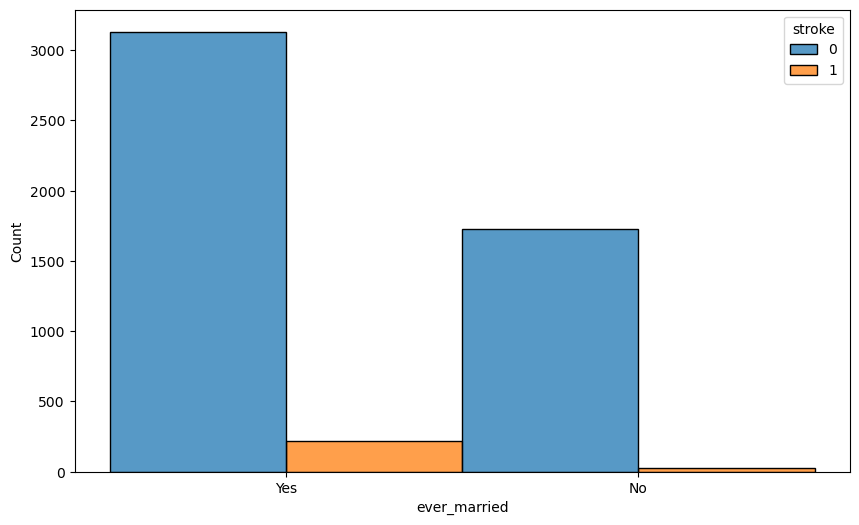

In [23]:
#plot ever_married count for stroke (1)/ no stroke (0) groupings
plt.figure(figsize=(10,6))
sns.histplot(data=df_final, x='ever_married', hue='stroke', multiple='dodge')

### 4.5 smoking_status

In [24]:
df_final["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

<Axes: xlabel='smoking_status', ylabel='Count'>

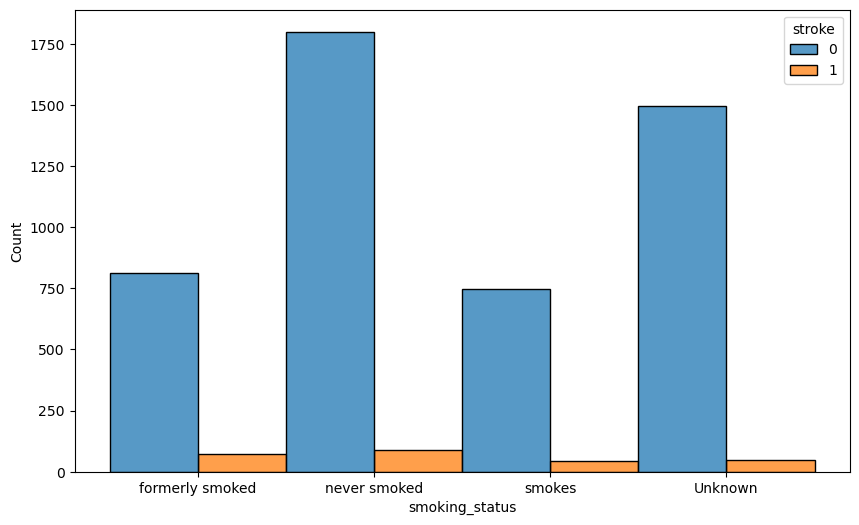

In [25]:
#plot smoking_status count for stroke (1)/ no stroke (0) groupings
plt.figure(figsize=(10,6))
sns.histplot(data=df_final, x='smoking_status', hue='stroke', multiple='dodge')

### 5. Review Numercial features

hypertension, heart_disease, avg_glucose_level, bmi, and stroke

#### 5.1 Hypertension

In [26]:
# hypertension counts in dataset
df_final.hypertension.value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x286402d8a50>,
 [Text(-1.1441733635762015, 0.36175587636239137, 'No Hypertension'),
  Text(1.1441733551086937, -0.36175590314370154, 'Hypertension')],
 [Text(-0.6674344620861175, 0.21102426121139495, '90.3%'),
  Text(0.667434457146738, -0.21102427683382588, '9.7%')])

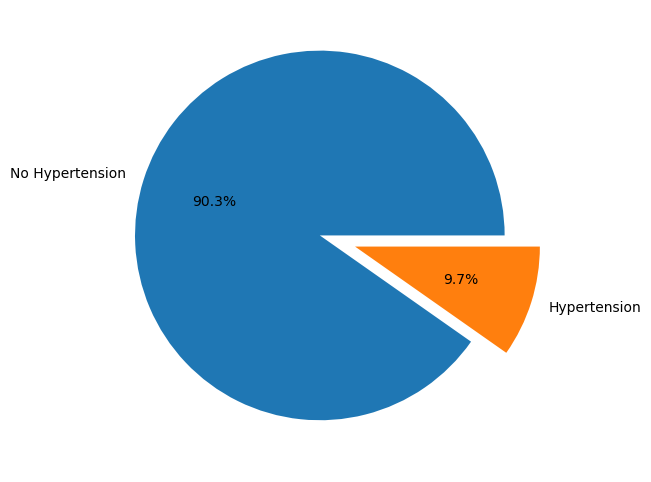

In [27]:
#plot hypertension counts as pie chart
plt.figure(figsize=(10,6))
plt.pie(df_final.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%', explode=(0.1,0.1))

#### 5.2 Heart Disease

In [28]:
# Heart Disease counts in dataset
df_final.heart_disease.value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2864041c990>,
 [Text(-1.182759309868518, 0.20268304053212524, 'No Heart Disease'),
  Text(1.1827593098685178, -0.2026830405321259, 'Heart Disease')],
 [Text(-0.6899429307566354, 0.11823177364373973, '94.6%'),
  Text(0.6899429307566354, -0.11823177364374012, '5.4%')])

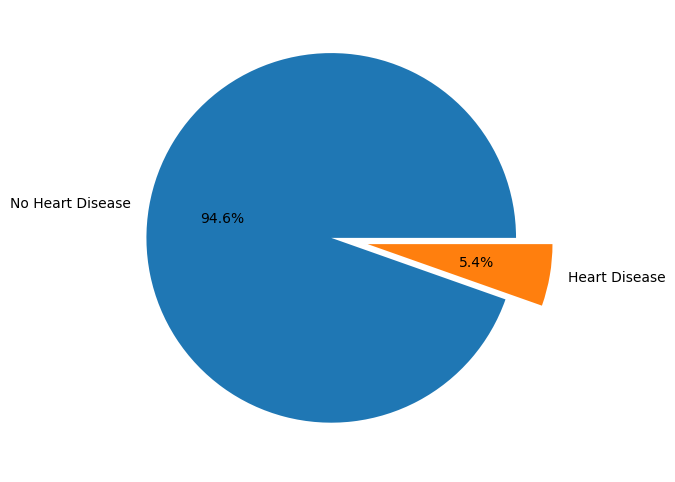

In [29]:
#plot heart disease counts as pie chart
plt.figure(figsize=(10,6))
plt.pie(df_final.heart_disease.value_counts(),labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%', explode=(0.1,0.1))

#### 5.3 Average Glucose Level

In [30]:
# Average Glucose Level sumnmary statistics in dataset
df_final.avg_glucose_level.describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

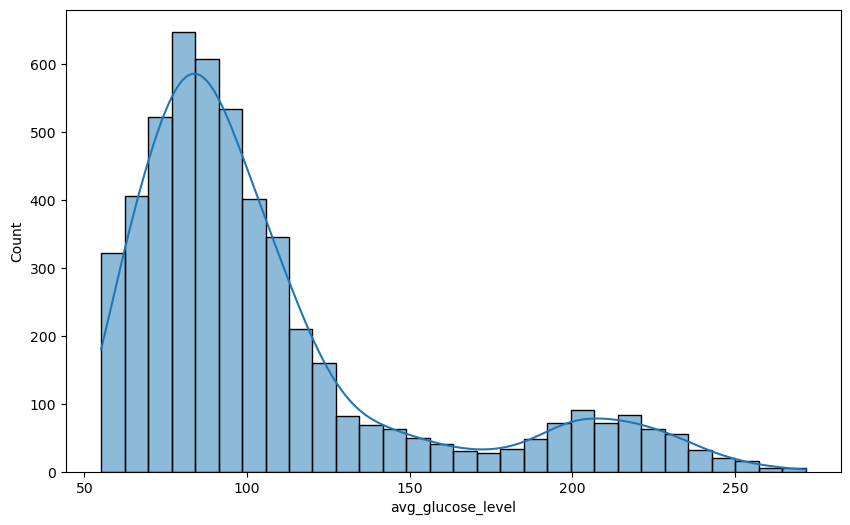

In [31]:
# Distribution of average glucose level in dataset
plt.figure(figsize=(10,6))
sns.histplot(df_final.avg_glucose_level,kde=True,bins=30)

#### 5.4 BMI

In [32]:
# BMI sumnmary statistics in dataset
df_final.bmi.describe()

count    5109.000000
mean       28.894508
std         7.698235
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

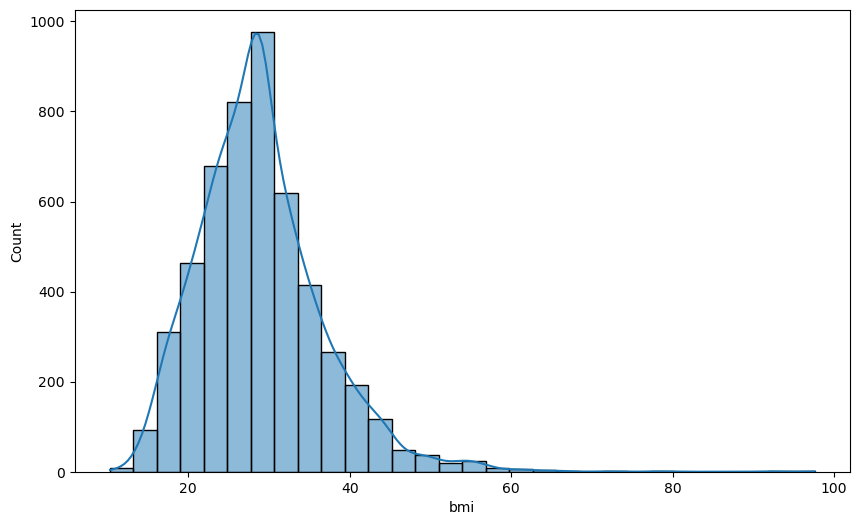

In [33]:
# Distribution of BMI level in dataset
plt.figure(figsize=(10,6))
sns.histplot(df_final.bmi,kde=True,bins=30)

### 6. Check for Outliers

<Axes: ylabel='avg_glucose_level'>

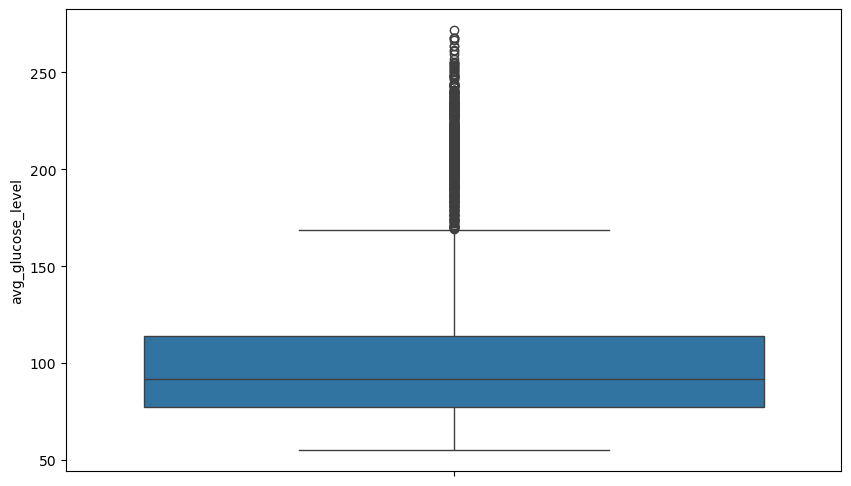

In [34]:
#Box plot for Averge Glucose Level
plt.figure(figsize=(10,6))
sns.boxplot(df_final.avg_glucose_level)

<Axes: ylabel='bmi'>

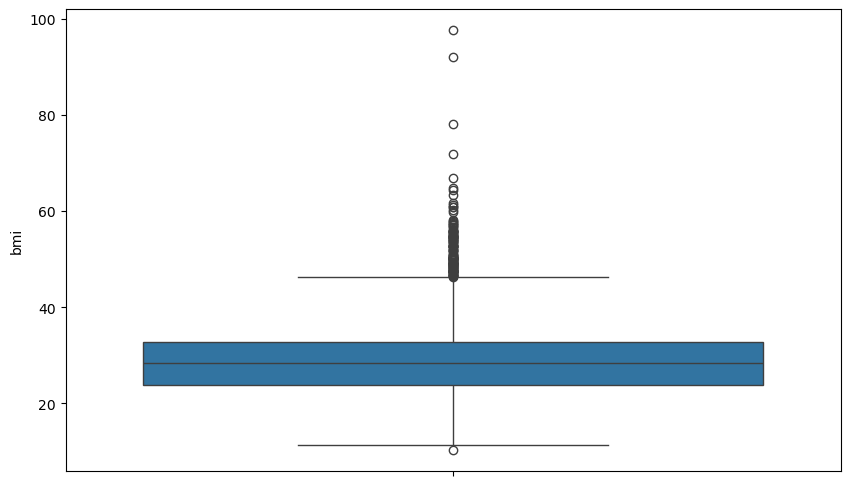

In [35]:
#Box plot for BMI
plt.figure(figsize=(10,6))
sns.boxplot(df_final.bmi)

### 7. Check Target Distribution

#### Stroke

In [36]:
df_final.stroke.value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x286439096d0>,
 [Text(-1.1859612211812496, 0.1830190751104355, 'No stroke'),
  Text(1.1859612190393143, -0.18301908899014838, 'Stroke')],
 [Text(-0.6918107123557289, 0.10676112714775404, '95.1%'),
  Text(0.6918107111062667, -0.10676113524425322, '4.9%')])

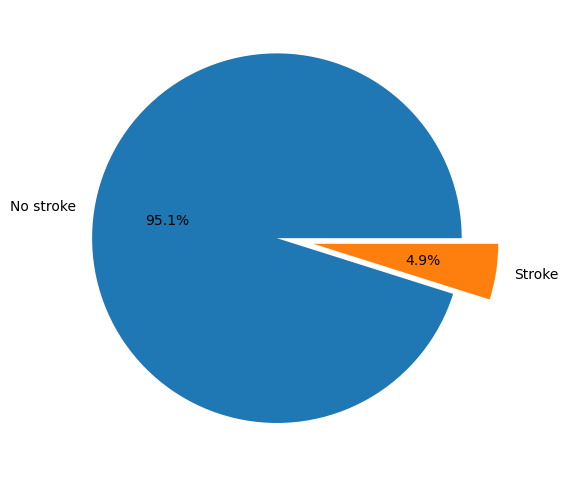

In [37]:
#plot stroke counts as pie chart
plt.figure(figsize=(10,6))
plt.pie(df_final.stroke.value_counts(),labels=['No stroke','Stroke'],autopct='%1.1f%%', explode=(0.1,0.1))

#### <span style="color:red"> *The target distribution is heavily skewed!!!* </span>

In [38]:
# Reset Index of the final data frame
df_final.reset_index(drop=True,inplace=True)
df_final

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,4
5105,Female,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,4
5106,Female,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2
5107,Male,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,3


### 8. Encode Categorical Values, Scale Numerical Values, and Split Dataset into Training and Testing

#### 8.1 Encoding

In [39]:
# call encoding function
encoders = p_utils.build_encoders(df_final)
encoders

[{'column': 'smoking_status',
  'multi_col_output': True,
  'encoder': OneHotEncoder(sparse_output=False)},
 {'column': 'work_type',
  'multi_col_output': True,
  'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)},
 {'column': 'Residence_type',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Urban', 'Rural']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'gender',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Male', 'Female']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'ever_married',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['No', 'Yes']], handle_unknown='use_encoded_value',
                 unknown_value=-1)}]

In [40]:
# Call encoding function by passing the entire data frame
df_encoded = p_utils.encode_categorical(df_final, encoders)

# check encoded sample values
df_encoded

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,1,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,1,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,1,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,1,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,1,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,83.75,28.893237,0,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5105,0,0,125.20,40.000000,0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5106,0,0,82.99,30.600000,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
5107,0,0,166.29,25.600000,0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### 8.2 Check Correlation between various features

<Axes: >

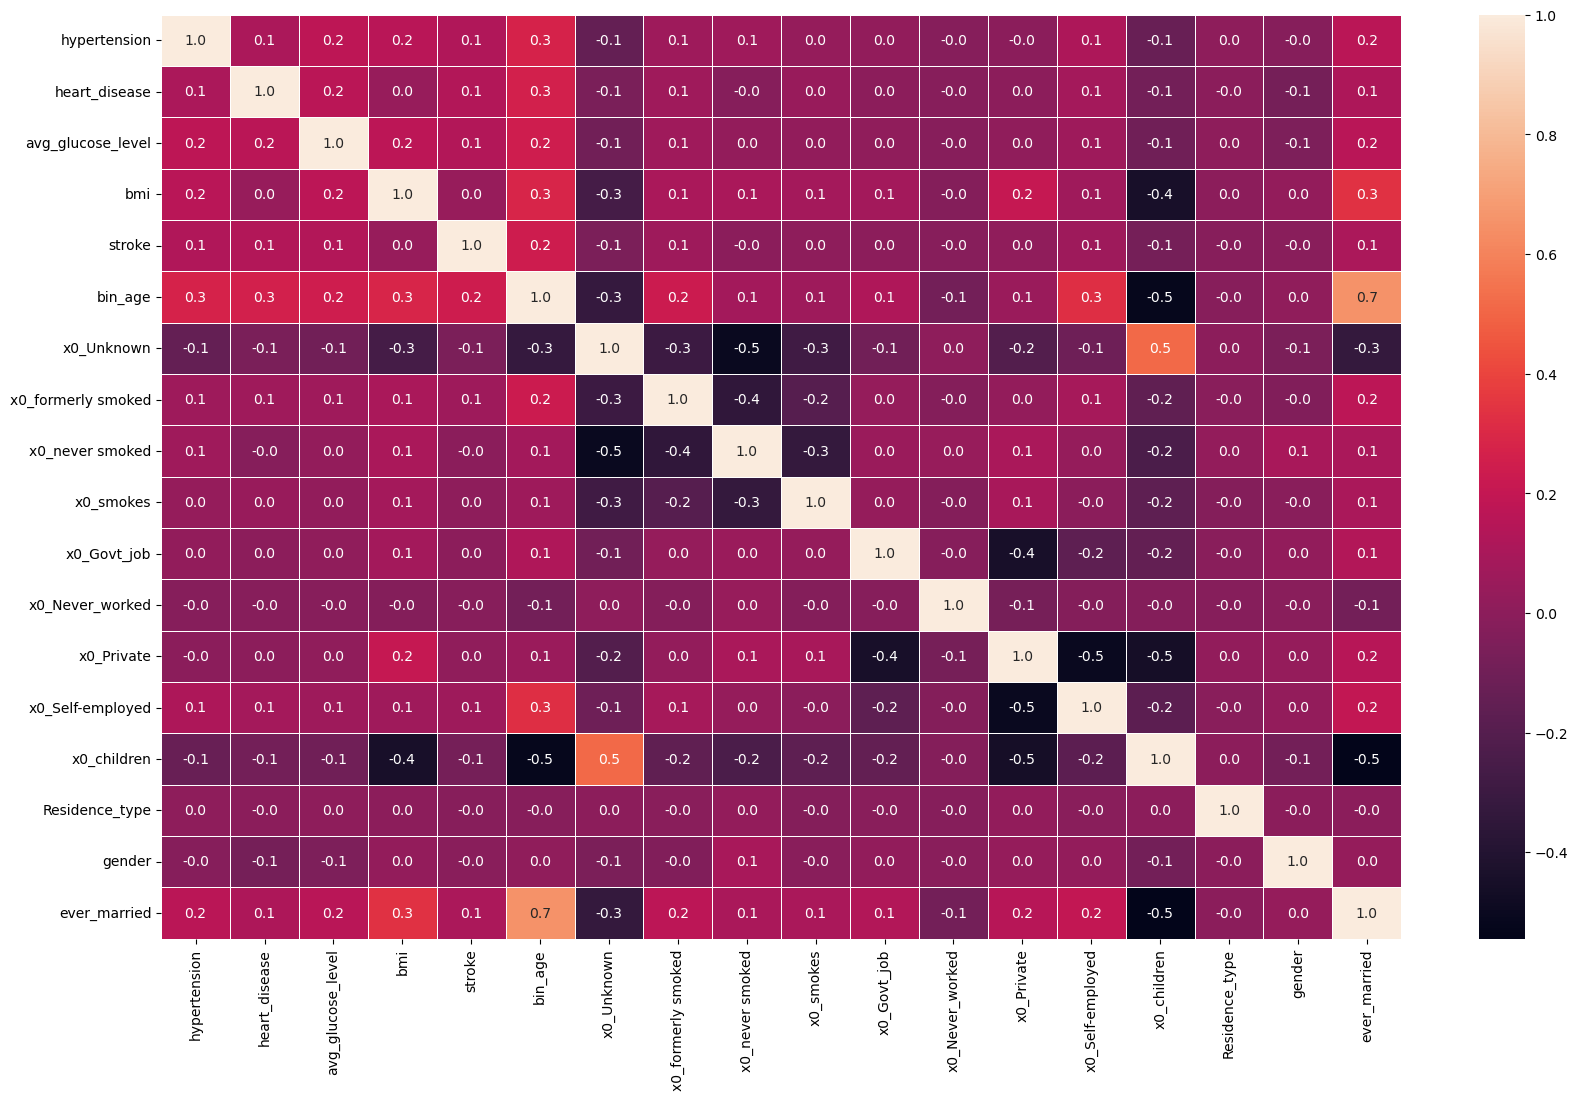

In [41]:
#Check correlation between various features
plt.figure(figsize=(20,12))
sns.heatmap(df_encoded.corr(),fmt=".1f", annot=True, linewidth=.5)

#### 8.3 Split Dataset into features (X) and target (y)

In [42]:
# Features
X=df_encoded.copy().drop(columns='stroke')

# Target
y=df_encoded['stroke']

In [43]:
# check sample features
X

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,83.75,28.893237,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5105,0,0,125.20,40.000000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5106,0,0,82.99,30.600000,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
5107,0,0,166.29,25.600000,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [44]:
# check sample target
y

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

#### 8.4 Identify columns (all numerical) that should be scaled

In [45]:
# create a list of columns which have numeric data types
numerical = X.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'bin_age',
 'x0_Unknown',
 'x0_formerly smoked',
 'x0_never smoked',
 'x0_smokes',
 'x0_Govt_job',
 'x0_Never_worked',
 'x0_Private',
 'x0_Self-employed',
 'x0_children',
 'Residence_type',
 'gender',
 'ever_married']

#### 8.5 Split Dataset in Training and Testing

In [46]:
# Split dataset into training and tesing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
# check X_train sample
X_train

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
1914,0,0,77.86,28.9,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1751,0,0,88.82,28.2,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
396,1,0,213.37,36.0,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1783,0,0,65.67,16.6,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2361,0,0,101.98,23.2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0,137.77,29.3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2763,0,0,63.73,32.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
905,0,0,76.26,35.6,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3980,0,0,76.45,28.7,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
# Check x_test sample
X_test

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,0,0,61.07,19.100000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3232,0,0,93.55,23.300000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3694,0,0,92.62,15.400000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1070,0,0,246.34,21.100000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4163,1,0,222.52,28.893237,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,0,0,85.38,23.400000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5077,0,0,76.31,15.500000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4878,0,0,81.88,18.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3125,0,0,114.61,40.100000,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### 8.6 Scale Numerical values in Training and Testing Datasets

In [49]:
# Scale all numberical columns in training dataset
X_train[numerical[:-1]] = StandardScaler().fit_transform(X_train[numerical[:-1]])

In [50]:
# check scaled Trained dataset
X_train

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
1914,-0.328917,-0.237773,-0.608034,0.007130,-0.433668,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,-1.182105,1.0
1751,-0.328917,-0.237773,-0.365389,-0.084914,1.369242,-0.666761,2.195948,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,0.845949,1.0
396,3.040282,-0.237773,2.392041,0.940714,0.467787,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,-1.182105,1.0
1783,-0.328917,-0.237773,-0.877910,-1.610207,-1.335122,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,-1.158930,-0.429226,2.520549,1.009705,-1.182105,0.0
2361,-0.328917,-0.237773,-0.074038,-0.742368,-0.433668,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,0.845949,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.328917,-0.237773,0.718322,0.059726,0.467787,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,-1.182105,1.0
2763,-0.328917,-0.237773,-0.920860,0.414751,-0.433668,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,0.845949,1.0
905,-0.328917,-0.237773,-0.643456,0.888118,-0.433668,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,0.845949,1.0
3980,-0.328917,-0.237773,-0.639250,-0.019169,1.369242,1.499788,-0.455384,-0.761442,-0.425809,2.581085,-0.068707,-1.158930,-0.429226,-0.396739,1.009705,-1.182105,1.0


In [51]:
# Scale all numberical columns in Test dataset
X_test[numerical[:-1]] = StandardScaler().fit_transform(X_test[numerical[:-1]])

In [52]:
# check scaled Test dataset
X_test

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,-0.327799,-0.242536,-1.043731,-1.247841,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3232,-0.327799,-0.242536,-0.330295,-0.720615,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3694,-0.327799,-0.242536,-0.350723,-1.712302,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,0.824239,0.0
1070,-0.327799,-0.242536,3.025797,-0.996781,1.378567,-0.632282,-0.463496,1.276569,-0.432006,-0.374237,-0.056033,-1.150494,2.175073,-0.386368,1.036665,0.824239,1.0
4163,3.050648,-0.242536,2.502581,-0.018496,1.378567,-0.632282,2.157514,-0.783349,-0.432006,-0.374237,-0.056033,0.869192,-0.459755,-0.386368,-0.964631,0.824239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,-0.327799,-0.242536,-0.509752,-0.708062,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
5077,-0.327799,-0.242536,-0.708979,-1.699749,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,0.824239,0.0
4878,-0.327799,-0.242536,-0.586631,-1.385924,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3125,-0.327799,-0.242536,0.132296,1.388289,0.485155,-0.632282,2.157514,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,2.175073,-0.386368,-0.964631,-1.213241,1.0


### 9. Train, Test, and Validate accuracy using various Models

#### 9.1 Logistics Regression

In [53]:
# Create the logistics Regression classifier instance
lr = LogisticRegression(random_state = 1)

In [54]:
# Train the model using training dataset
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [55]:
# Predict the results using testing dataset
lr_predictions = lr.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278



C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


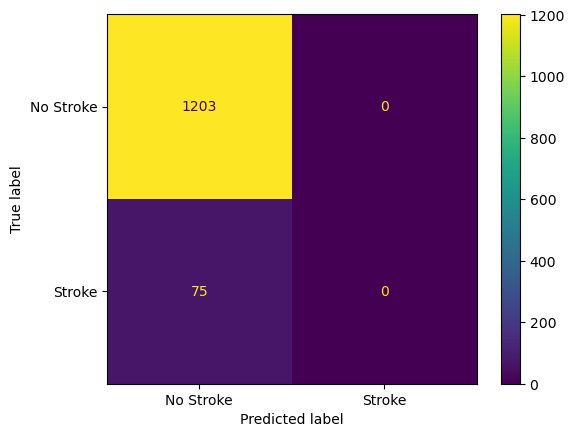

In [56]:
# Check Prediction results accuracy
print(classification_report(y_test,lr_predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test,lr_predictions),display_labels=['No Stroke', 'Stroke']).plot()

In [57]:
accuracy_score(y_test, lr_predictions)

0.9413145539906104

In [58]:
print(balanced_accuracy_score(y_test, lr_predictions))

0.5


In [59]:
# Create a confusion matrix for logistic regression model
print(confusion_matrix(y_test, lr_predictions, labels = [1,0]))

[[   0   75]
 [   0 1203]]


### <span style="color:red"> *Poor prediction. Dataset is unbalanced. Recommended to use a sampler model such as Random under sampler or over sampler!!* </span>

#### 9.2 Random Forest

In [60]:
# Create the random forest classifier instance
rf = RandomForestClassifier(n_estimators=128, random_state=1)

# Train the model using training dataset
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [61]:
# Predict the results using testing dataset
rf_predictions = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278



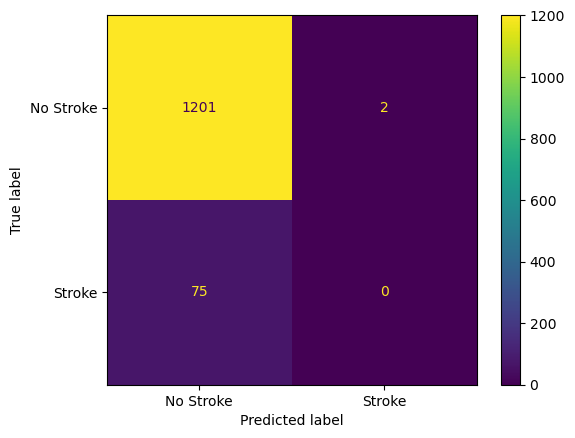

In [62]:
# Check Prediction results accuracy
print(classification_report(y_test,rf_predictions)) 
ConfusionMatrixDisplay(confusion_matrix(y_test,rf_predictions),display_labels=['No Stroke','Stroke']).plot()

In [63]:
accuracy_score(y_test, rf_predictions)

0.9397496087636933

In [64]:
print(balanced_accuracy_score(y_test, rf_predictions))

0.499168744804655


In [65]:
# Create a confusion matrix for logistic regression model
print(confusion_matrix(y_test, rf_predictions, labels = [1,0]))

[[   0   75]
 [   2 1201]]


### <span style="color:red"> *Still Poor prediction. Dataset is unbalanced. Recommended to use a sampler model such as Random under sampler or over sampler!!* </span>

#### 9.3 Random under sampler

RandomUnderSampler: Randomly removes data points from the majority class to reduce its size and match the minority class. This approach can be faster than oversampling techniques

In [66]:
# Create the random forest classifier instance for under sampling
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [67]:
# Check undersampled size
print(X_under_resampled.shape,y_under_resampled.shape)

(498, 17) (498,)


In [68]:
# Check undersampled target counts in the under samnpling
print(y_under_resampled.value_counts())

stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.67      0.57      0.62        68
           1       0.68      0.77      0.72        82

    accuracy                           0.68       150
   macro avg       0.68      0.67      0.67       150
weighted avg       0.68      0.68      0.68       150



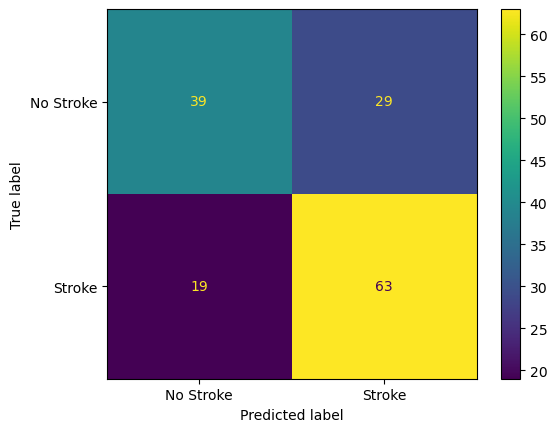

In [69]:
# Train_Test Split, Fit, Predict, Check Accuracy
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)

#Intatiate random forest classifier
model = RandomForestClassifier(random_state=1)

#Fit Model
model.fit(X_train,y_train)

# Predict Model
y_pred = model.predict(X_test)

#Check Accuracy
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

#### 9.4 Random Over Sampler

In [70]:
# Create the random forest classifier instance for Over sampling
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)

In [71]:
print(X_over_resampled.shape,y_over_resampled.shape)

(9720, 17) (9720,)


In [72]:
print(y_over_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.98      1460

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



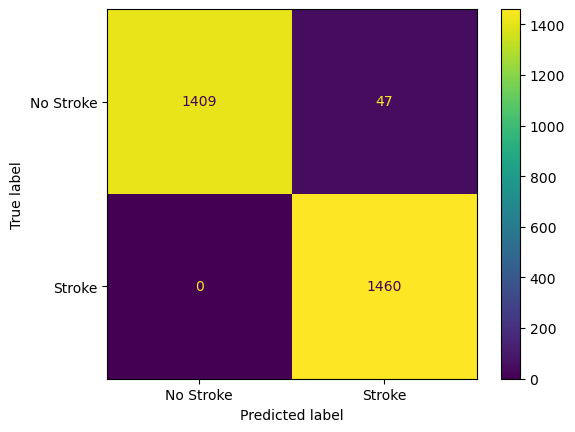

In [73]:
# Train_Test Split, Fit, Predict, Check Accuracy
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=1)

#Intatiate random forest classifier
model = RandomForestClassifier(random_state=1)

#Fit Model
model.fit(X_train,y_train)

# Predict Results
y_pred = model.predict(X_test)

# Check Accuracy of predicted results
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

In [74]:
print(balanced_accuracy_score(y_test, y_pred))

0.9838598901098901


### <span style="color:blue"> *We have a winner! under and Over Sampling improved prediction!! Over Sampling has improved prediction, whereas Under Sampling has improved sensitivity. Let's expmore more!* </span>

### 10. Check the effect of scaling on prediction. 

Perform scaling before splitting into train and test

In [75]:
# Scale Numerical column values using standard Scaler
X[numerical[:-1]] = StandardScaler().fit_transform(X[numerical[:-1]])

In [76]:
# Check results
X

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,-0.328637,4.184599,2.706450,1.001041,1.371519,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,-1.189791,1.0
1,-0.328637,-0.238972,2.121652,-0.000165,0.472136,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
2,-0.328637,4.184599,-0.004867,0.468399,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,1.016380,-1.189791,1.0
3,-0.328637,-0.238972,1.437473,0.715233,0.472136,-0.658103,-0.457417,-0.766893,2.339933,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
4,3.042866,-0.238972,1.501297,-0.635858,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,3.042866,-0.238972,-0.494481,-0.000165,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
5105,-0.328637,-0.238972,0.420922,1.442744,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.983884,0.840484,1.0
5106,-0.328637,-0.238972,-0.511266,0.221565,-0.427246,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
5107,-0.328637,-0.238972,1.328375,-0.427998,0.472136,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,1.016380,-1.189791,1.0


#### 10.1 Random Under Sampler with Scaling

In [77]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [78]:
print(X_under_resampled.shape,y_under_resampled.shape)

(498, 17) (498,)


In [79]:
print(y_under_resampled.value_counts())

stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.75      0.72      0.74        68
           1       0.78      0.80      0.79        82

    accuracy                           0.77       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.77      0.77      0.77       150



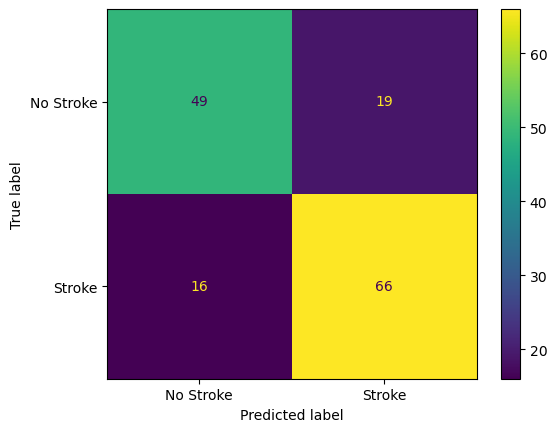

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

#### 10.2 Random Over Sampler with Scaling

In [81]:
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)


In [82]:
print(X_over_resampled.shape,y_over_resampled.shape)

(9720, 17) (9720,)


In [83]:
print(y_over_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.98      1460

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



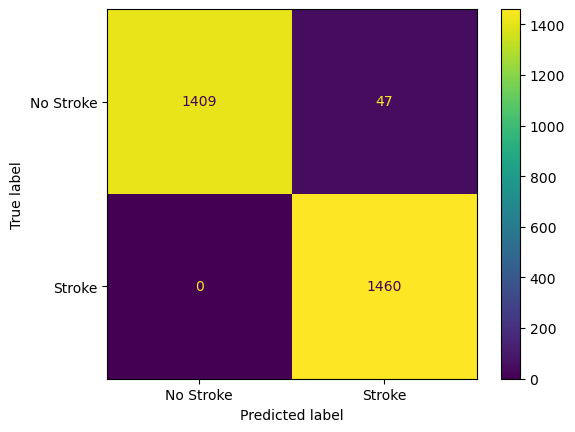

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

### <span style="color:blue"> *No Major change in predicted results due to scaling prior to splitting into Train and Test!!* </span>

### 11. Identify the most important Features contributing to the stroke

In [85]:
# Get the feature importance array
importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.2698617494001905, 'avg_glucose_level'),
 (0.23582740911144137, 'bmi'),
 (0.21883774272756723, 'bin_age'),
 (0.04578690793591359, 'ever_married'),
 (0.03239141743891487, 'hypertension'),
 (0.029993058364011827, 'Residence_type'),
 (0.028053877031588702, 'gender'),
 (0.021983208596061756, 'heart_disease'),
 (0.017933337598137495, 'x0_never smoked'),
 (0.01713555056512056, 'x0_Self-employed')]

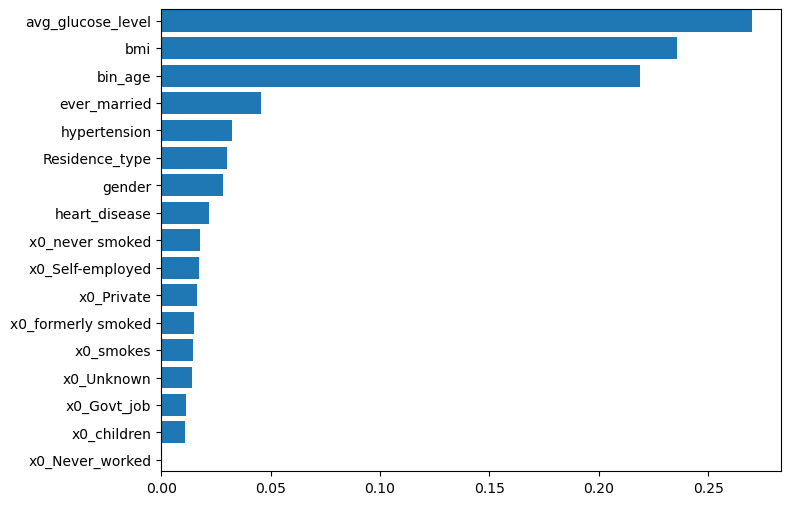

In [86]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

### 12. Rerun for 1000 random Sample to see the results of both under sampled and over sampled data

#### 12.1 Run the Random Sampler

In [87]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print(X_under_resampled.shape,y_under_resampled.shape)
print(y_under_resampled.value_counts())

(498, 17) (498,)
stroke
0    249
1    249
Name: count, dtype: int64


#### 12.2 Run Random Forest Fit-> Train -> Predict -> Validate using confusion Matrix and Balanced Accuracy Score

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        68
           1       0.76      0.78      0.77        82

    accuracy                           0.75       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.75      0.75      0.75       150



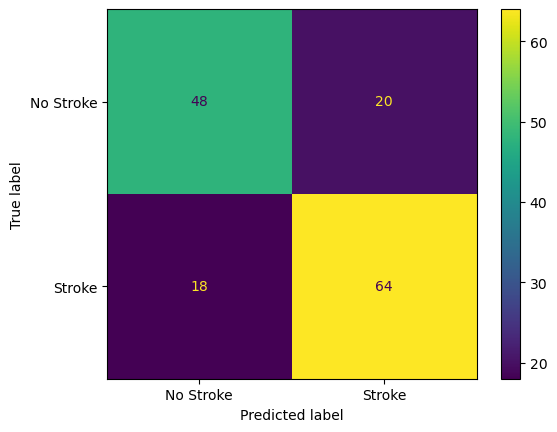

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

#### 12.3 Validate model using a random 1000 records

In [89]:
#x_test_1000; dataframe.sample(1000, randomize)
#rebuild confusion Matrix
X_sample=X.sample(1000,random_state=1)

In [90]:
X_sample

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,-0.328637,-0.238972,-0.995358,-1.272430,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,-1.189791,0.0
3232,-0.328637,-0.238972,-0.278053,-0.726797,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,-1.189791,0.0
3694,-0.328637,-0.238972,-0.298592,-1.753107,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,0.840484,0.0
1070,-0.328637,-0.238972,3.096242,-1.012605,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
4163,3.042866,-0.238972,2.570188,-0.000165,1.371519,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.042866,-0.238972,1.962201,0.507373,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.983884,-1.189791,1.0
3399,3.042866,4.184599,-0.727694,0.598312,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
4272,-0.328637,-0.238972,-0.783568,-0.220138,-0.427246,-0.658103,-0.457417,1.303962,-0.427363,2.603124,-0.065763,-1.156812,-0.436931,-0.394157,1.016380,0.840484,0.0
1380,-0.328637,-0.238972,0.136915,-1.402343,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,0.840484,0.0


In [91]:
# Select random X and Y rows from the original data set
df_encoded_scaled=df_encoded.copy()
df_encoded_scaled[numerical[:-1]]=StandardScaler().fit_transform(df_encoded_scaled[numerical[:-1]])
df_sample = df_encoded_scaled.sample(1000,random_state=1)
X_1=df_sample.copy().drop(columns='stroke')
# Target
y_1=df_sample['stroke']

In [92]:
# Check Random 1000 Feature rows
X_1

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,-0.328637,-0.238972,-0.995358,-1.272430,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,-1.189791,0.0
3232,-0.328637,-0.238972,-0.278053,-0.726797,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,-1.189791,0.0
3694,-0.328637,-0.238972,-0.298592,-1.753107,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,0.840484,0.0
1070,-0.328637,-0.238972,3.096242,-1.012605,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
4163,3.042866,-0.238972,2.570188,-0.000165,1.371519,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.042866,-0.238972,1.962201,0.507373,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.983884,-1.189791,1.0
3399,3.042866,4.184599,-0.727694,0.598312,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
4272,-0.328637,-0.238972,-0.783568,-0.220138,-0.427246,-0.658103,-0.457417,1.303962,-0.427363,2.603124,-0.065763,-1.156812,-0.436931,-0.394157,1.016380,0.840484,0.0
1380,-0.328637,-0.238972,0.136915,-1.402343,-1.326629,1.519519,-0.457417,-0.766893,-0.427363,-0.384154,-0.065763,-1.156812,-0.436931,2.537062,-0.983884,0.840484,0.0


In [93]:
# Check ranom 1000 target rows
y_1

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
58      1
3399    0
4272    0
1380    0
1852    0
Name: stroke, Length: 1000, dtype: int64

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       941
           1       0.17      0.95      0.29        59

    accuracy                           0.72      1000
   macro avg       0.58      0.83      0.56      1000
weighted avg       0.95      0.72      0.80      1000



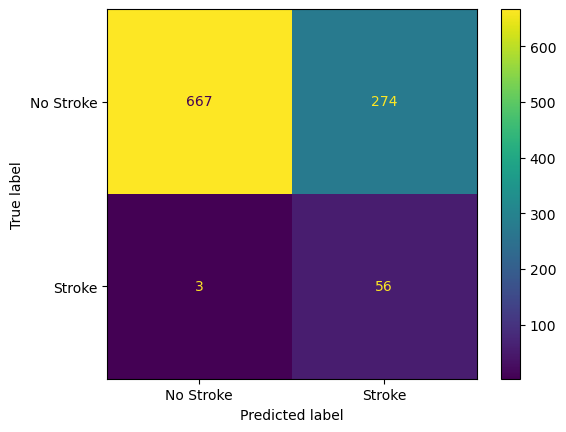

In [94]:
# Predict using the above trained model using random 1000 rows
y_pred_sample = model.predict(X_1)
print(classification_report(y_1,y_pred_sample))
ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

In [95]:
print(balanced_accuracy_score(y_1, y_pred_sample))

0.8289864730992993


#### The above result shows that sensitivity improved (higher number of False Positives relative to False Negatives), even though it comes at the cost of precision (True Positives are lower than the over Sampled Cases)

### 13 Apply other Modeling Techniques
#### 13.1 SVM

In [96]:
#df_encoded_scaled=df_encoded.copy()
#df_encoded_scaled[numerical[:-1]]=StandardScaler().fit_transform(df_encoded_scaled[numerical[:-1]])
 
X_2=df_encoded_scaled.copy().drop(columns='stroke')
# Target
y_2=df_encoded_scaled['stroke']

In [97]:
X_2

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,-0.328637,4.184599,2.706450,1.001041,1.371519,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,-1.189791,1.0
1,-0.328637,-0.238972,2.121652,-0.000165,0.472136,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
2,-0.328637,4.184599,-0.004867,0.468399,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,1.016380,-1.189791,1.0
3,-0.328637,-0.238972,1.437473,0.715233,0.472136,-0.658103,-0.457417,-0.766893,2.339933,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
4,3.042866,-0.238972,1.501297,-0.635858,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,3.042866,-0.238972,-0.494481,-0.000165,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.983884,0.840484,1.0
5105,-0.328637,-0.238972,0.420922,1.442744,1.371519,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.983884,0.840484,1.0
5106,-0.328637,-0.238972,-0.511266,0.221565,-0.427246,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,1.016380,0.840484,1.0
5107,-0.328637,-0.238972,1.328375,-0.427998,0.472136,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,1.016380,-1.189791,1.0


In [98]:
y_2

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

In [99]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=1)

In [100]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')

In [101]:
# Fit the model to the training data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [102]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % model.score(X_train, y_train))
print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Train Accuracy: 0.955
Test Accuracy: 0.941


In [103]:
# Make and save testing predictions with the saved SVM model using the testing data
svc_predictions = model.predict(X_test)

# Review the predictions
svc_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
# Display the accuracy score for the testing dataset
accuracy_score(y_test, svc_predictions)

0.9413145539906104

In [105]:
print(balanced_accuracy_score(y_test, svc_predictions))

0.5


### 13.2 KNN

k: 1, Train/Test Score: 1.000/0.915
k: 3, Train/Test Score: 0.958/0.936
k: 5, Train/Test Score: 0.956/0.940
k: 7, Train/Test Score: 0.955/0.941
k: 9, Train/Test Score: 0.955/0.941
k: 11, Train/Test Score: 0.955/0.941
k: 13, Train/Test Score: 0.955/0.941
k: 15, Train/Test Score: 0.955/0.941
k: 17, Train/Test Score: 0.955/0.941
k: 19, Train/Test Score: 0.955/0.941


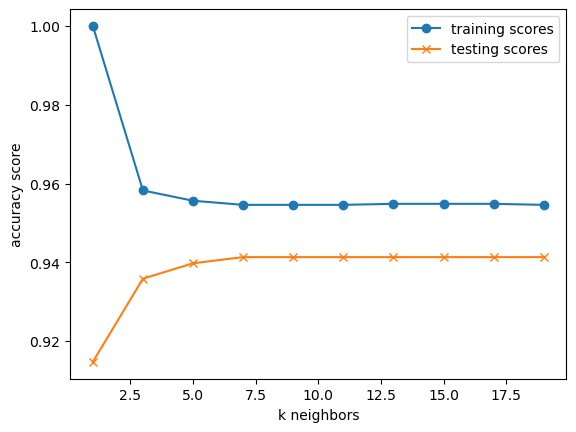

In [106]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [107]:
# Train the KNN model with the best k value
# Note that k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.936


In [108]:
knn_predictions = knn.predict(X_test)

In [109]:
print(balanced_accuracy_score(y_test, knn_predictions))

0.5158437240232752


#### 13.3 ExtraTressClassifier

In [110]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

# Predict Model and check balanced accuracy
clf_predictions = clf.predict(X_test)
print(balanced_accuracy_score(y_test, clf_predictions))

Training Score: 1.0
Testing Score: 0.931924882629108
0.5012635078969244


#### 13.4 GradientBoostingClassifier

In [111]:
clf = GradientBoostingClassifier(random_state=1).fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

clf_predictions = clf.predict(X_test)
print(balanced_accuracy_score(y_test, clf_predictions))

Training Score: 0.9605847037327069
Testing Score: 0.9405320813771518
0.4995843724023275


#### 13.5 AdaBoostClassifier

In [112]:
# Train the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

clf_predictions = clf.predict(X_test)
print(balanced_accuracy_score(y_test, clf_predictions))

Training Score: 0.9545810493343775
Testing Score: 0.9405320813771518
0.4995843724023275


### 14 Retrain the Model using the under Sampling for all the models and run the corresponding random 1000 rows test results

#### 14.1 Prepare the under sampled data, split them into train and test, and feed them into each individual model as below

In [113]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X_2, y_2)
print(X_under_resampled.shape,y_under_resampled.shape)
print(y_under_resampled.value_counts())

X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)

(498, 17) (498,)
stroke
0    249
1    249
Name: count, dtype: int64


### 14.2 Random Forest

Training Score: 1.0
Testing Score: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        68
           1       0.78      0.74      0.76        82

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150

Balanced Accuracy Score: 0.75


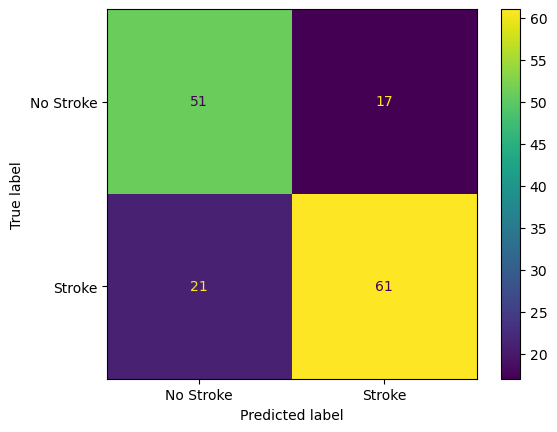

In [114]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

In [115]:
# Get the feature importance array
importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.24465467108349326, 'bin_age'),
 (0.20513781823106317, 'bmi'),
 (0.2011225615115464, 'avg_glucose_level'),
 (0.06234395207538549, 'ever_married'),
 (0.03871621614574466, 'gender'),
 (0.032250585865290955, 'Residence_type'),
 (0.0300283747104489, 'heart_disease'),
 (0.027176439600144615, 'hypertension'),
 (0.025274063633252224, 'x0_Self-employed'),
 (0.02483766418706621, 'x0_Private')]

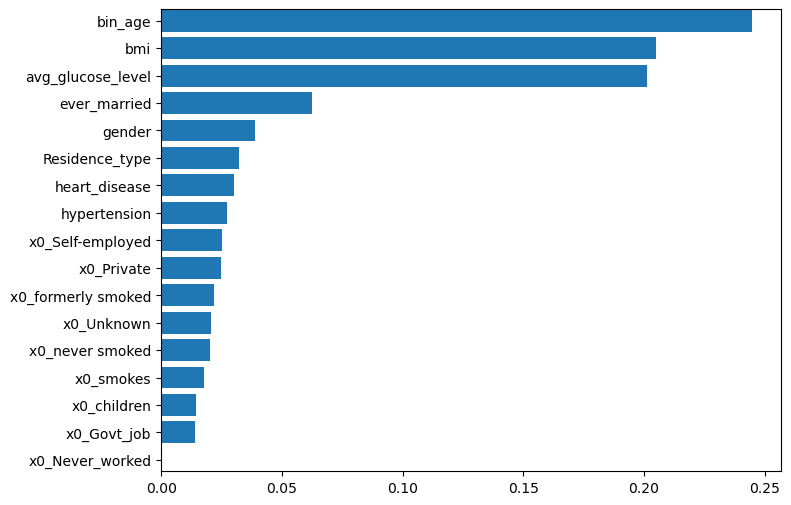

In [116]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       941
           1       0.15      0.90      0.26        59

    accuracy                           0.70      1000
   macro avg       0.57      0.79      0.53      1000
weighted avg       0.94      0.70      0.78      1000

Balanced Accuracy Score: 0.79


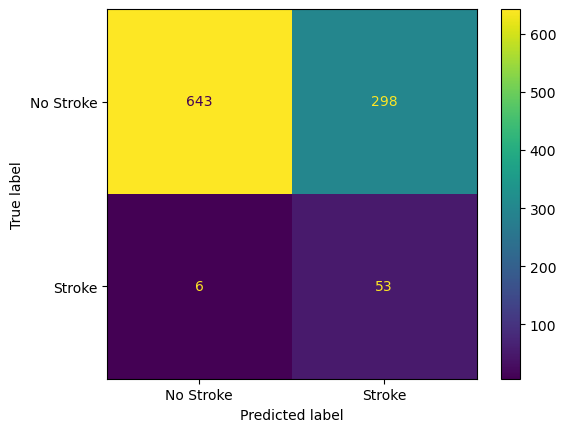

In [117]:
# Test the Model for 1000 random rows. X_1 (features) and Y_1 (Target) has corresponding 1000 random rows
y_pred_sample = model.predict(X_1)
# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 14.3 SVM

Training Score: 0.7988505747126436
Testing Score: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        68
           1       0.79      0.78      0.79        82

    accuracy                           0.77       150
   macro avg       0.76      0.77      0.76       150
weighted avg       0.77      0.77      0.77       150

Balanced Accuracy Score: 0.77


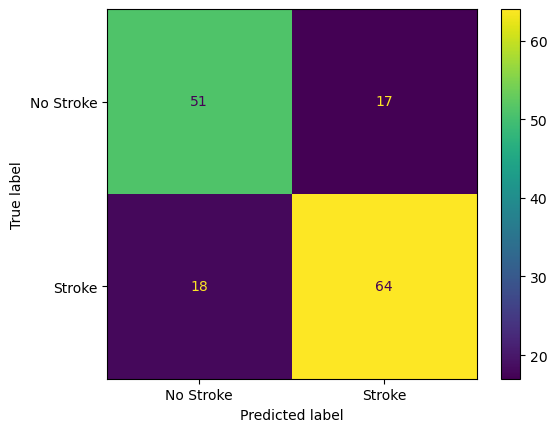

In [118]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       941
           1       0.16      0.90      0.28        59

    accuracy                           0.72      1000
   macro avg       0.58      0.81      0.55      1000
weighted avg       0.94      0.72      0.80      1000

Balanced Accuracy Score: 0.81


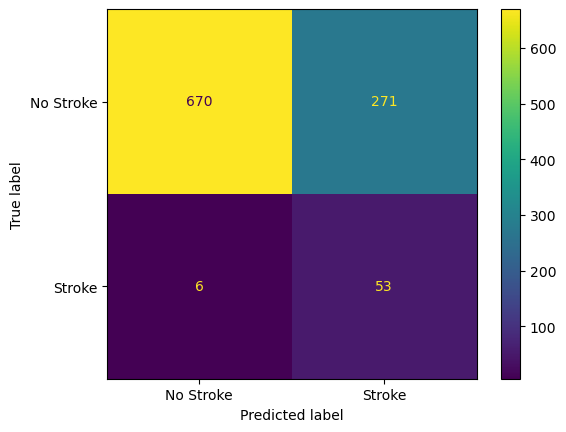

In [119]:
y_pred_sample = model.predict(X_1)
# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 14.4 KNN

Training Score: 0.8132183908045977
Testing Score: 0.64
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        68
           1       0.68      0.63      0.66        82

    accuracy                           0.64       150
   macro avg       0.64      0.64      0.64       150
weighted avg       0.64      0.64      0.64       150

Balanced Accuracy Score: 0.64


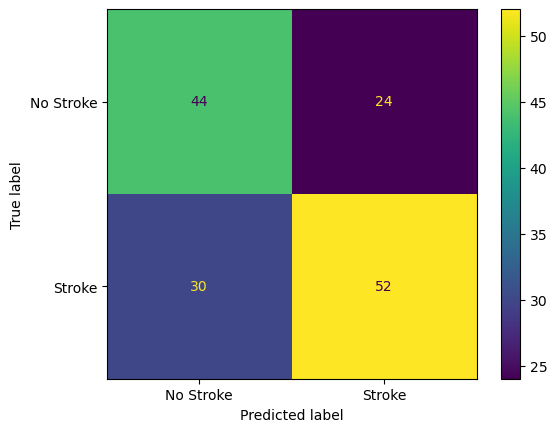

In [120]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       941
           1       0.12      0.81      0.21        59

    accuracy                           0.63      1000
   macro avg       0.55      0.72      0.48      1000
weighted avg       0.93      0.63      0.73      1000

Balanced Accuracy Score: 0.72


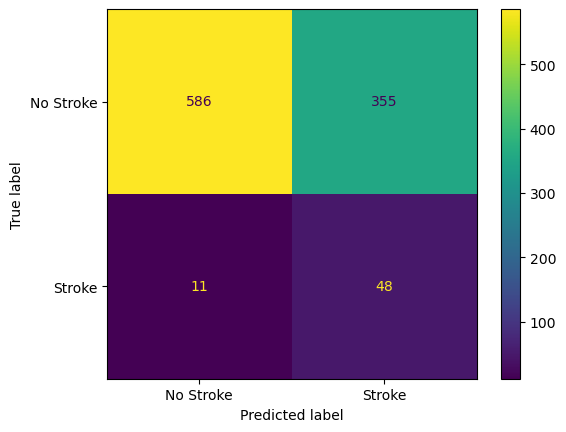

In [121]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 14.5 Extra Trees Classifier

Training Score: 1.0
Testing Score: 0.7266666666666667
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        68
           1       0.77      0.71      0.74        82

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150

Balanced Accuracy Score: 0.73


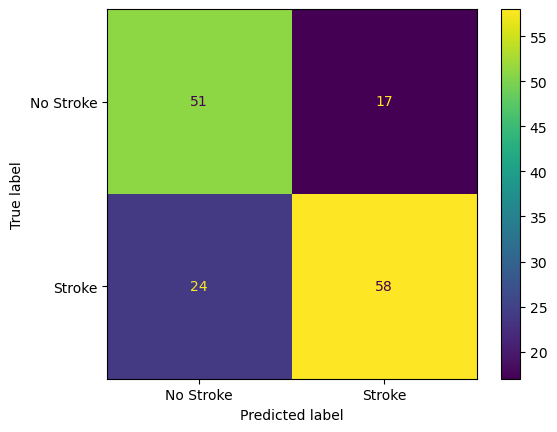

In [122]:
model = ExtraTreesClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.69      0.82       941
           1       0.15      0.90      0.26        59

    accuracy                           0.70      1000
   macro avg       0.57      0.80      0.54      1000
weighted avg       0.94      0.70      0.78      1000

Balanced Accuracy Score: 0.80


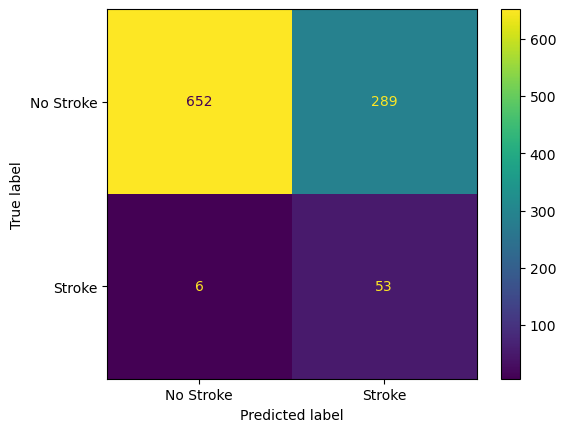

In [123]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 14.6 GradientBoostingClassifier

Training Score: 0.9511494252873564
Testing Score: 0.7
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        68
           1       0.71      0.76      0.73        82

    accuracy                           0.70       150
   macro avg       0.70      0.69      0.70       150
weighted avg       0.70      0.70      0.70       150

Balanced Accuracy Score: 0.69


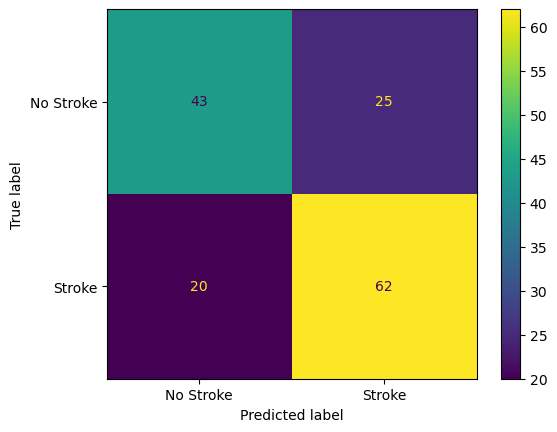

In [124]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       941
           1       0.16      0.90      0.27        59

    accuracy                           0.71      1000
   macro avg       0.57      0.80      0.54      1000
weighted avg       0.94      0.71      0.78      1000

Balanced Accuracy Score: 0.80


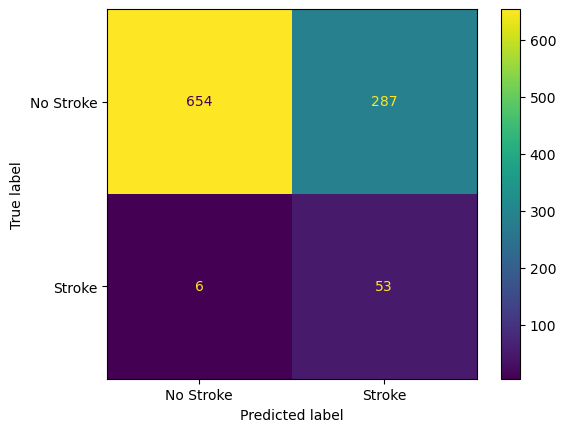

In [125]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 14.7 AdaBoostClassifier

Training Score: 0.8275862068965517
Testing Score: 0.7
              precision    recall  f1-score   support

           0       0.68      0.65      0.66        68
           1       0.72      0.74      0.73        82

    accuracy                           0.70       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.70      0.70      0.70       150

Balanced Accuracy Score: 0.70


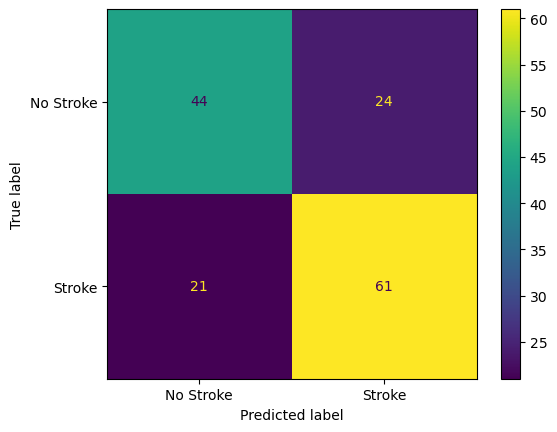

In [126]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       941
           1       0.14      0.80      0.24        59

    accuracy                           0.70      1000
   macro avg       0.56      0.74      0.52      1000
weighted avg       0.93      0.70      0.78      1000

Balanced Accuracy Score: 0.74


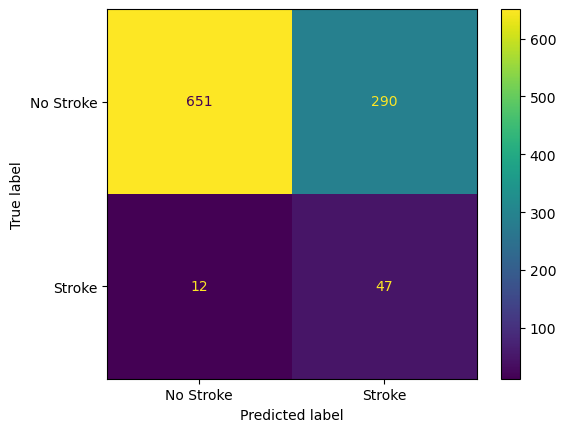

In [127]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

### 15. Repeat training and testing of the models on over sampled datatset. The results will be compared against under sampled dataset to evaluate the precision and sesitivity scores of each model

#### 15.1 Prepare dataset for over sampling model training, testing

In [128]:
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X_2, y_2)
print(X_over_resampled.shape,y_over_resampled.shape)
print(y_over_resampled.value_counts())

X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=1)

(9720, 17) (9720,)
stroke
1    4860
0    4860
Name: count, dtype: int64


#### 15.2  Random Forest

Training Score: 1.0
Testing Score: 0.9838820301783264
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.98      1460

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916

Balanced Accuracy Score: 0.98


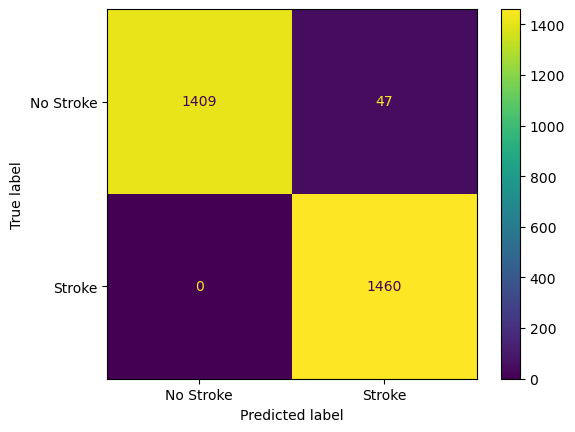

In [129]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       941
           1       0.83      1.00      0.91        59

    accuracy                           0.99      1000
   macro avg       0.92      0.99      0.95      1000
weighted avg       0.99      0.99      0.99      1000

Balanced Accuracy Score: 0.99


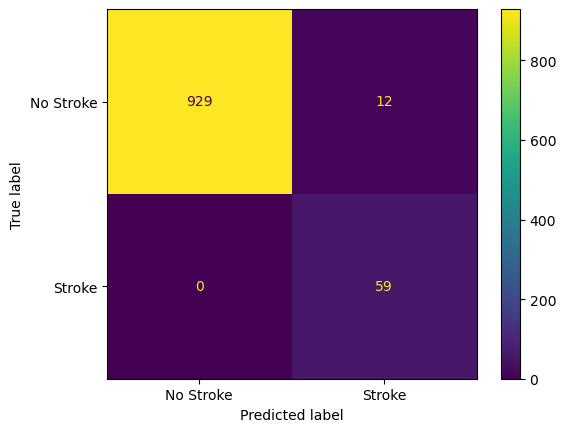

In [130]:
# Test for 1000 rows
y_pred_sample = model.predict(X_1)
# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 15.3  SVM

Training Score: 0.7591122868900647
Testing Score: 0.7616598079561042
              precision    recall  f1-score   support

           0       0.82      0.66      0.74      1456
           1       0.72      0.86      0.78      1460

    accuracy                           0.76      2916
   macro avg       0.77      0.76      0.76      2916
weighted avg       0.77      0.76      0.76      2916

Balanced Accuracy Score: 0.76


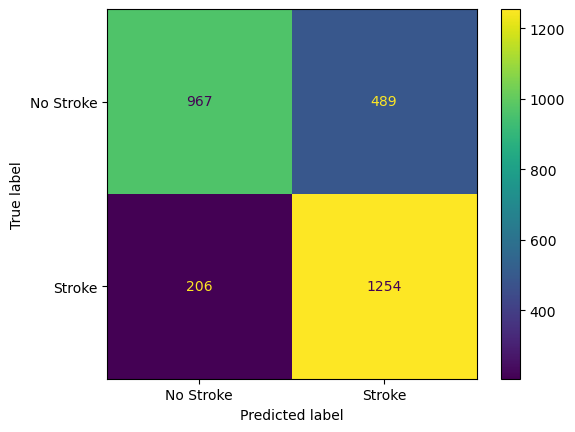

In [131]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       941
           1       0.14      0.88      0.25        59

    accuracy                           0.68      1000
   macro avg       0.57      0.78      0.52      1000
weighted avg       0.94      0.68      0.77      1000

Balanced Accuracy Score: 0.78


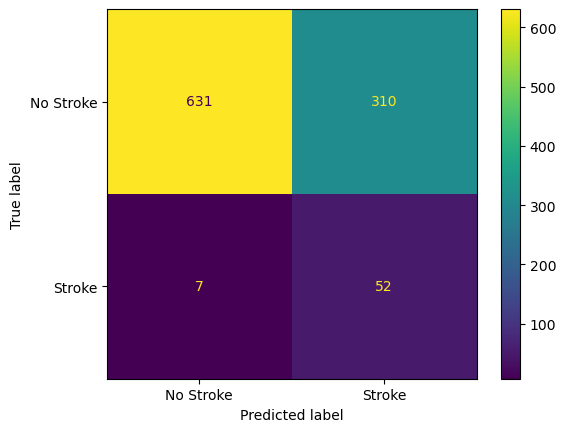

In [132]:
# Test for 1000 Rows
y_pred_sample = model.predict(X_1)
# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 15.4  KNN

Training Score: 0.966931216931217
Testing Score: 0.9447873799725651
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1456
           1       0.90      1.00      0.95      1460

    accuracy                           0.94      2916
   macro avg       0.95      0.94      0.94      2916
weighted avg       0.95      0.94      0.94      2916

Balanced Accuracy Score: 0.94


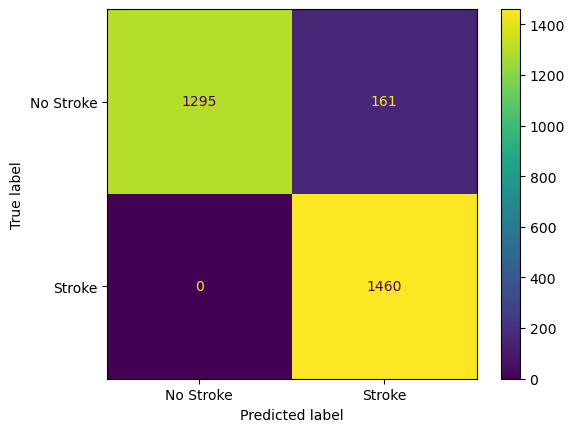

In [133]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       941
           1       0.46      1.00      0.63        59

    accuracy                           0.93      1000
   macro avg       0.73      0.96      0.79      1000
weighted avg       0.97      0.93      0.94      1000

Balanced Accuracy Score: 0.96


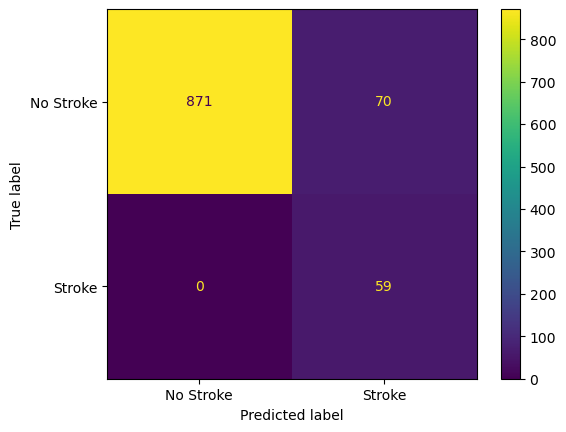

In [134]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 15.5  Extra Trees Classifier

Training Score: 1.0
Testing Score: 0.9862825788751715
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1456
           1       0.97      1.00      0.99      1460

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916

Balanced Accuracy Score: 0.99


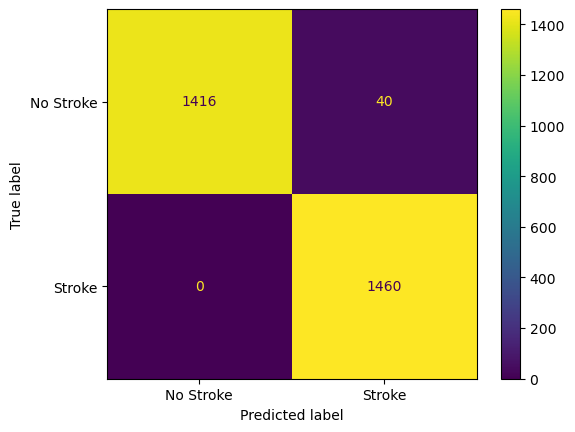

In [135]:
model = ExtraTreesClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       941
           1       0.87      1.00      0.93        59

    accuracy                           0.99      1000
   macro avg       0.93      1.00      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Balanced Accuracy Score: 1.00


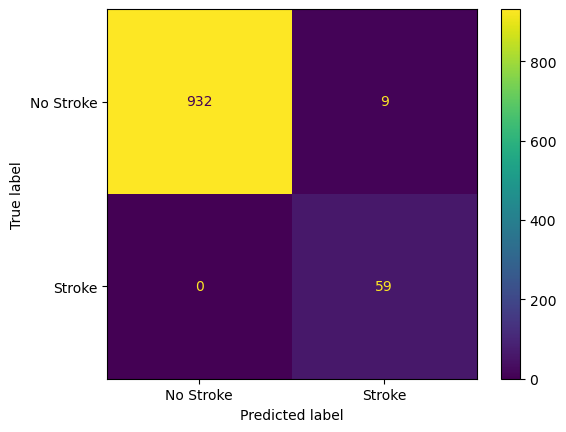

In [136]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 15.6  Gradient Boosting Classifier

Training Score: 0.8474426807760141
Testing Score: 0.8401920438957476
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1456
           1       0.80      0.90      0.85      1460

    accuracy                           0.84      2916
   macro avg       0.85      0.84      0.84      2916
weighted avg       0.85      0.84      0.84      2916

Balanced Accuracy Score: 0.84


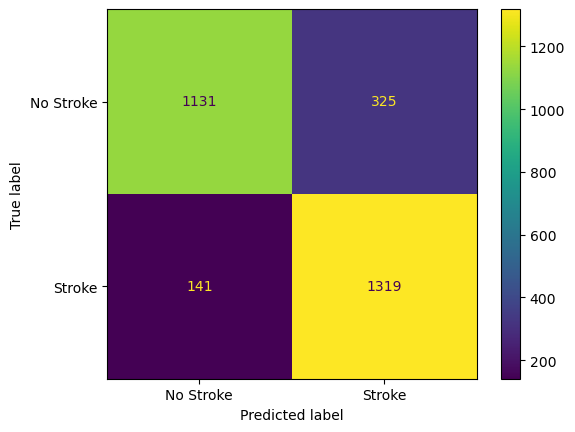

In [137]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       941
           1       0.20      0.90      0.33        59

    accuracy                           0.78      1000
   macro avg       0.60      0.84      0.60      1000
weighted avg       0.95      0.78      0.84      1000

Balanced Accuracy Score: 0.84


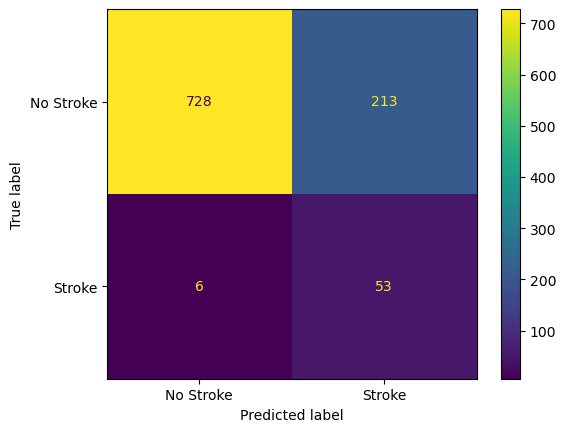

In [138]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()

#### 15.7  Ada Boost Classifier

Training Score: 0.7921810699588477
Testing Score: 0.7856652949245542
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1456
           1       0.75      0.86      0.80      1460

    accuracy                           0.79      2916
   macro avg       0.79      0.79      0.78      2916
weighted avg       0.79      0.79      0.78      2916

Balanced Accuracy Score: 0.79


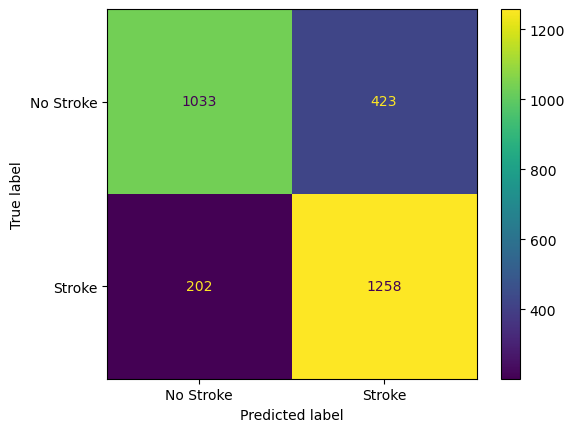

In [139]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')
print(f'{classification_report(y_test,y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       941
           1       0.16      0.88      0.27        59

    accuracy                           0.72      1000
   macro avg       0.57      0.79      0.55      1000
weighted avg       0.94      0.72      0.79      1000

Balanced Accuracy Score: 0.79


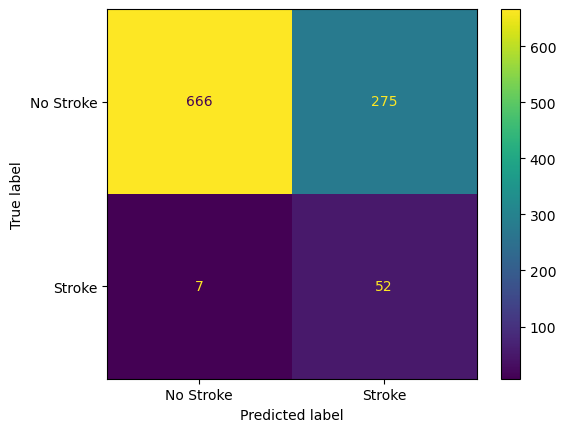

In [140]:
# Predict for sample 1000 rows
y_pred_sample = model.predict(X_1)

# Evaluate the model
print(f'{classification_report(y_1,y_pred_sample)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_1, y_pred_sample):.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_1,y_pred_sample),display_labels=['No Stroke','Stroke']).plot()